# Continous Control with Multiple-Agent DDPG
---
In this notebook, I trained DDPG with Unity Reacher environment. In this implementation, the multiple-agent environement is used.

In this implementation, I used the DDPG algorithm.

### 1. Import the Necessary Packages

In [2]:
from env_wrapper import EnvironmentWrapper
from ddpg_agent import Agent
import torch
from collections import deque
import numpy as np
import matplotlib.pyplot as plt
from ddpg import DDPG
%matplotlib inline

### 2. Instantiate the Environment and Agent

In [2]:
env = EnvironmentWrapper()
ag = Agent(state_size=env.state_size, action_size=env.action_size, random_seed=42)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 20
Size of each action: 4
Each observes a state with length: 33


### 3. Train the Agent with DDPG

In [3]:
DRL = DDPG(env, ag)
scores = DRL.train()

Episode 1	Average Score: 0.59
Episode 2	Average Score: 0.56
Episode 3	Average Score: 0.47
Episode 4	Average Score: 0.36
Episode 5	Average Score: 0.31
Episode 6	Average Score: 0.28
Episode 7	Average Score: 0.27
Episode 8	Average Score: 0.27
Episode 9	Average Score: 0.30
Episode 10	Average Score: 0.36
Episode 11	Average Score: 0.39
Episode 12	Average Score: 0.45
Episode 13	Average Score: 0.48
Episode 14	Average Score: 0.54
Episode 15	Average Score: 0.60
Episode 16	Average Score: 0.66
Episode 17	Average Score: 0.72
Episode 18	Average Score: 0.82
Episode 19	Average Score: 0.95
Episode 20	Average Score: 1.04
Episode 21	Average Score: 1.15
Episode 22	Average Score: 1.25
Episode 23	Average Score: 1.39
Episode 24	Average Score: 1.49
Episode 25	Average Score: 1.62
Episode 26	Average Score: 1.78
Episode 27	Average Score: 1.98
Episode 28	Average Score: 2.19
Episode 29	Average Score: 2.39
Episode 30	Average Score: 2.52
Episode 31	Average Score: 2.70
Episode 32	Average Score: 2.88
Episode 33	Averag

# Plotting the Rewards

In the figure below, the blue dots are total rewards from each agents in every episode. The red line is the average score with window size 10. 

Text(0,0.5,'Scores and Average (10 Episodes)')

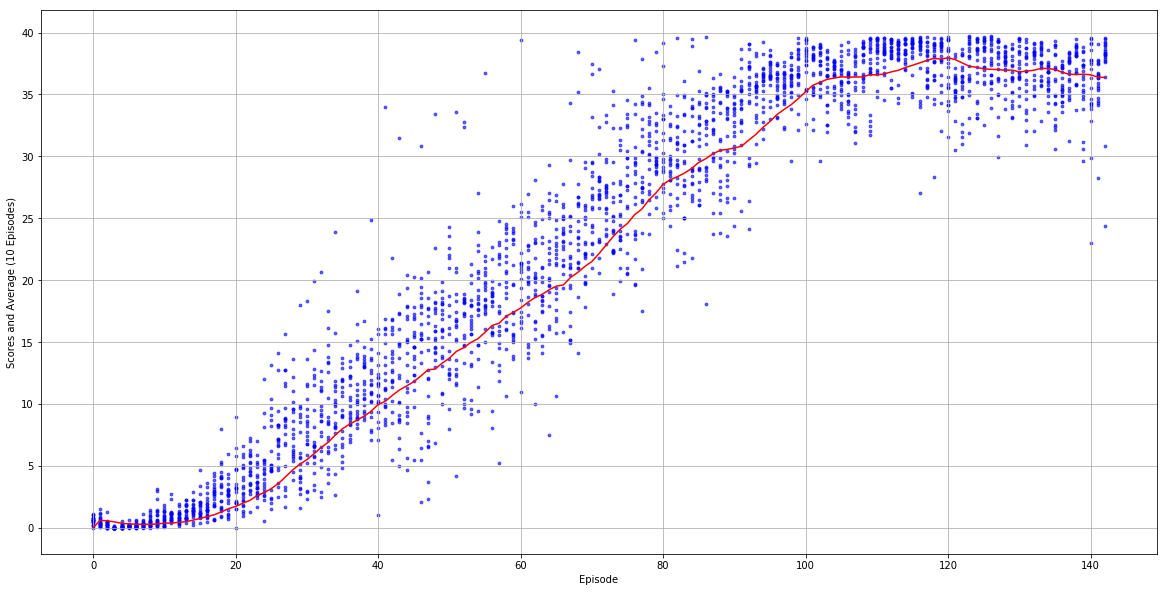

In [24]:
scores=np.array(scores)
m,n=scores.shape
plt.figure(figsize=(20,10))
avg=[0]
for ep in range(1, m):
    avg.append(np.mean(scores[max(ep-10,0):ep,:]))
plt.plot(avg,'r')
for i in range(n):
    plt.scatter(np.arange(m), scores[:,i], c='b', s=8, alpha=0.6)
plt.grid()
plt.xlabel('Episode')
plt.ylabel('Scores and Average (10 Episodes)')

### 4. Watch a Smart Agent!

In [4]:
from unityagents import UnityEnvironment
ag = Agent(state_size=33, action_size=4, random_seed=42)
ag.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
ag.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))
env = UnityEnvironment(file_name='Reacher_Linux_SingleAgent/Reacher.x86_64')

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))

env_info = env.reset(train_mode=False)[brain_name]     # reset the environment
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
for _ in range(1000):
    actions = ag.act(states) # select an action (for each agent)    
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

env.close()


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
Total score (averaged over agents) this episode: 39.439999118447304
